In [0]:
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize

from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
url = 'https://raw.githubusercontent.com/k0nci/oznal/master/data/mbti_1.csv'

raw_data = pd.read_csv(url)
raw_data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'A black dog. He was cute. :3 Don't have a goo...
freq,1832,1


In [0]:
raw_data['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


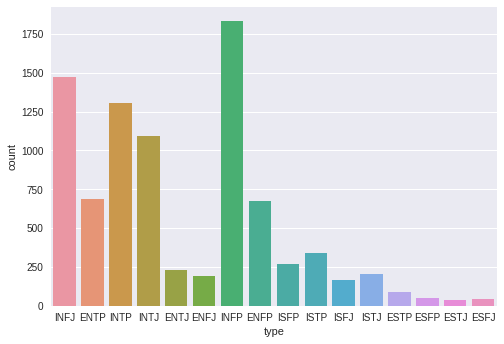

In [0]:
sns.countplot(x='type', data=raw_data)

In [0]:
data = raw_data['posts'].apply(lambda x: pd.Series([y.strip() for y in x.split('|||')])) \
                        .reset_index() \
                        .rename(columns={'index': 'user_id'}) \
                        .merge(raw_data, left_index=True, right_index=True) \
                        .drop(columns=['posts']) \
                        .melt(id_vars=['user_id', 'type'], value_name='post', var_name='post_id') \
                        .dropna(subset=['post']) \
                        .sort_values(by=['user_id', 'post_id']) \
                        .reset_index(drop=True)

data.describe()

,user_id
count,422845.000000
mean,4340.423529
std,2506.825488
min,0.000000
25%,2165.000000
50%,4345.000000
75%,6515.000000
max,8674.000000


In [0]:
data[data['post'] == '']['post'].count()

1088

In [0]:
data['I'] = data['type'].apply(lambda x: 1 if x[0] == 'I' else 0)
data['E'] = data['type'].apply(lambda x: 1 if x[0] == 'E' else 0)

data['N'] = data['type'].apply(lambda x: 1 if x[1] == 'N' else 0)
data['S'] = data['type'].apply(lambda x: 1 if x[1] == 'S' else 0)

data['T'] = data['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
data['F'] = data['type'].apply(lambda x: 1 if x[2] == 'F' else 0)

data['J'] = data['type'].apply(lambda x: 1 if x[3] == 'J' else 0)
data['P'] = data['type'].apply(lambda x: 1 if x[3] == 'P' else 0)

data.head()

,user_id,type,post_id,post,I,E,N,S,T,F,J,P
0,0,INFJ,0,'http://www.youtube.com/watch?v=qsXHcwe3krw,1,0,1,0,0,1,1,0
1,0,INFJ,1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,1,0,1,0,0,1,1,0
2,0,INFJ,2,enfp and intj moments https://www.youtube.com...,1,0,1,0,0,1,1,0
3,0,INFJ,3,What has been the most life-changing experienc...,1,0,1,0,0,1,1,0
4,0,INFJ,4,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,1,0,1,0,0,1,1,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


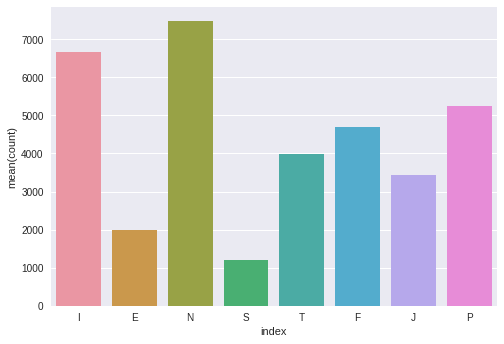

In [0]:
classes = data[['user_id', 'I', 'E', 'N', 'S', 'T', 'F', 'J', 'P']] \
          .groupby('user_id') \
          .max() \
          .sum() \
          .reset_index(name='count')

sns.barplot(x='index', y='count', data=classes)

In [0]:
data['urls_count'] = data['post'].apply(lambda x: len(re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', x)))

data['urls_count'].describe()

count    422845.000000
mean          0.067663
std           0.290195
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: urls_count, dtype: float64

In [0]:
data[data['urls_count'] > 0]['urls_count'].count()

25221

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


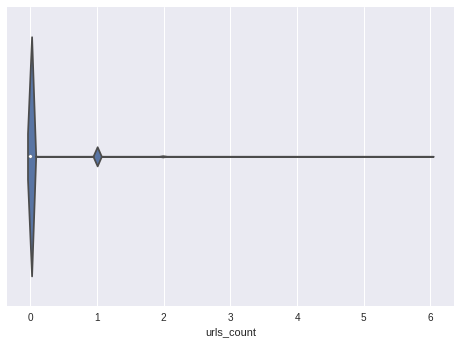

In [0]:
sns.violinplot(x='urls_count', data=data)

Nie vsetky riadky maju 50 postov ako je uvedene v opise datasetu, pozor

In [0]:
data['words_count'] = data['post'].apply(lambda x: len(x.split()))

data['words_count'].describe()

count    422845.000000
mean         26.133243
std          13.074386
min           0.000000
25%          14.000000
50%          32.000000
75%          37.000000
max          66.000000
Name: words_count, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


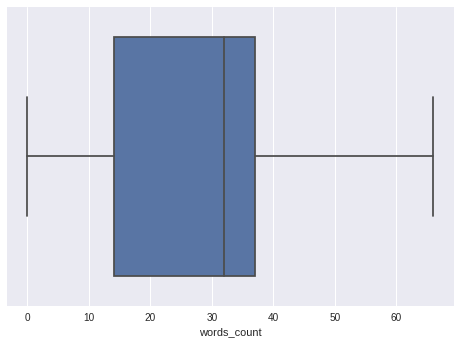

In [0]:
sns.boxplot(x='words_count', data=data)

In [0]:
for x in data[data['words_count'] > 50].post:
  print(x)

44 6f 6e 27 74 20 72 61 69 6e 20 6f 6e 20 6f 75 72 20 70 61 72 61 64 65 2c 20 77 65 27 72 65 20 68 61 76 69 6e 67 20 66 75 6e 2e 20 49 20 77 61 73 20 62 65 69 6e 67 20 66 61 63 65 74 69 6f 75 73 20...
49 20 6c 6f 76 65 20 69 74 21 20 59 6f 75 27 72 65 20 6d 79 20 6e 65 77 20 66 72 69 65 6e 64 2e 20 54 68 61 6e 6b 73 20 66 6f 72 20 70 6c 61 79 69 6e 67 20 61 6c 6f 6e 67 2e 20 4e 6f 74 69 63 65 20...
Watch this video, you smile ! I love cats forever <3  h t t p : / / w w w . d a i l y m o t i o n . c o m / v i d e o / x 3 x j 8 s _ l e s -chats-les-plus-droles_fun#.UR9_eR30JOg  ps : I was...
9 > 4 > 7 > 3 > 5 = 2 > 6 > 1 > 8   Not so sure, though. After the first three types it gets a bit blurry.  I can relate to aspects of types 3, 5, 2 and 6 to some extent, but it's hard to tell how...
How fascinating.  I'm a 7-3-8 which means:  As a 7 I'm best with a 1, 5, 8, or 3 As a 3 I'm best with a 1, 6, 9, or 5 As a 8 I'm best with a 9, 4, 6, or 8  1, 5, 8, 9, 6 are the ones that show...
A = 16.

In [0]:
data['sentences_count'] = data['post'].apply(lambda x: len(sent_tokenize(x)))

data['sentences_count'].describe()

count    422845.000000
mean          2.394232
std           1.276447
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          24.000000
Name: sentences_count, dtype: float64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


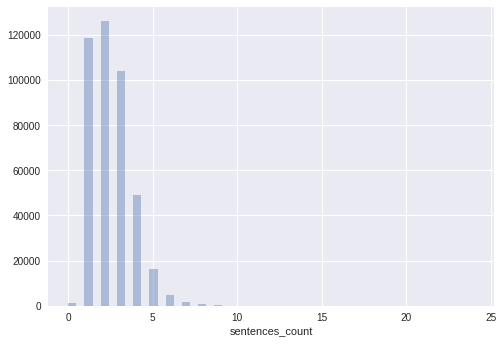

In [0]:
sns.distplot(data['sentences_count'], kde=False)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


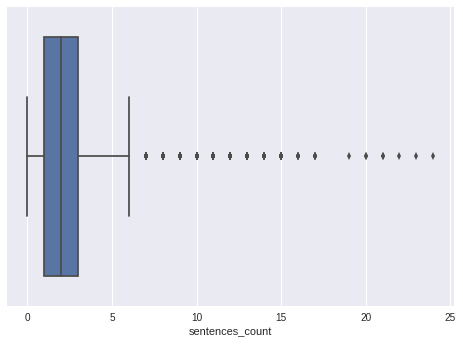

In [0]:
sns.boxplot(x='sentences_count', data=data)

In [0]:
for x in data[data['sentences_count'] > 15].post:
  print(x)

1. Sometimes. Usually no. 2. Sometimes. Usually no. 3. Happy, yes. Confidant, yes. Invigorated, maybe. Energized, no. 4. Nope, but Fs might. 5. Yes. 6. No. 7. Very little.  Don't like people?...
1. Hybrid cars? I will when one comes out in a Beetle or Mini  2. Classical music? Yes, on occasion.  3. Tea? Iced with mint.  4. Cats? No. 5. ABBA? Not especially.  6. Steampunk art? Yes, love...
*goes to speak. . ..stops*  *Goes to speak again. . . .stops.*  . . . .Cheating is usually a pretty good tactic. . .um. . .strategically. . .it usually makes sense, assuming you can get away with...
Poker play . . . . mainly Texas Hold'em. Yeah pardner . . . . that'll usually do it :cool: math & strategic thinking skills . . . . coolness under pressure . . . . reading people . . . . . ...
1. No. 2. No. 3. Yes. 4. No. 5. Yes. 6. Don't know! (I don't really drink anything with caffeine in it, haha). 7. Yes. 8. Yes. 9. Yes. 10. Yes.
'1. Yes 2. Yes 3. Not in public, so yes. 4. Not in public, but yes. 5. N

In [0]:
data['words_per_sentence'] = data['words_count'] / data['sentences_count']

data['words_per_sentence'].describe()

count    421757.000000
mean         12.094120
std           7.797479
min           0.500000
25%           7.000000
50%          11.000000
75%          16.000000
max          66.000000
Name: words_per_sentence, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


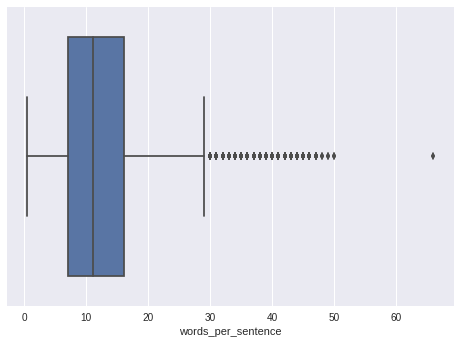

In [0]:
sns.boxplot(x='words_per_sentence', data=data)

In [0]:
data[data['words_per_sentence'] > 50]

,user_id,type,post_id,post,I,E,N,S,T,F,J,P,urls_count,words_count,sentences_count,words_per_sentence
75938,1556,INTJ,0,44 6f 6e 27 74 20 72 61 69 6e 20 6f 6e 20 6f 7...,1,0,1,0,1,0,1,0,0,66,1,66.0
75941,1556,INTJ,3,49 20 6c 6f 76 65 20 69 74 21 20 59 6f 75 27 7...,1,0,1,0,1,0,1,0,0,66,1,66.0


In [0]:
data[data['user_id'].isin(data[data['words_per_sentence'] > 60]['user_id'])]

,user_id,type,post_id,post,I,E,N,S,T,F,J,P,urls_count,words_count,sentences_count,words_per_sentence
75938,1556,INTJ,0,44 6f 6e 27 74 20 72 61 69 6e 20 6f 6e 20 6f 7...,1,0,1,0,1,0,1,0,0,66,1,66.000000
75939,1556,INTJ,1,R29vZCBwb2ludCwgYnV0IEknbSBzdXJlIHRoZXkgYXJlIH...,1,0,1,0,1,0,1,0,0,1,1,1.000000
75940,1556,INTJ,2,01000010 01110101 01110100 00100000 01110011 0...,1,0,1,0,1,0,1,0,0,22,1,22.000000
75941,1556,INTJ,3,49 20 6c 6f 76 65 20 69 74 21 20 59 6f 75 27 7...,1,0,1,0,1,0,1,0,0,66,1,66.000000
75942,1556,INTJ,4,01001001 00100000 01100100 01101111 00100000 0...,1,0,1,0,1,0,1,0,0,22,1,22.000000
75943,1556,INTJ,5,"I agree, the IQ test is really not an accurate...",1,0,1,0,1,0,1,0,0,31,2,15.500000
75944,1556,INTJ,6,In my case: I am a personally very happy fello...,1,0,1,0,1,0,1,0,0,39,3,13.000000
75945,1556,INTJ,7,I typically find the stereotypical naivety cha...,1,0,1,0,1,0,1,0,0,38,3,12.666667
75946,1556,INTJ,8,There is an inherent dilemma in this question....,1,0,1,0,1,0,1,0,0,35,3,11.666667
75947,1556,INTJ,9,"Gandalf the Grey, absolutely. Totally fits the...",1,0,1,0,1,0,1,0,0,15,2,7.500000


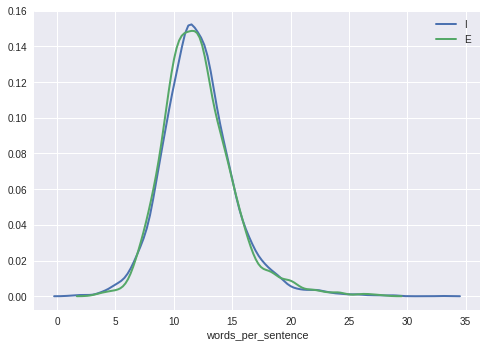

In [0]:
subset = data[data['I'] == 1].groupby('user_id').mean()
sns.distplot(subset['words_per_sentence'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'I')

subset = data[data['I'] == 0].groupby('user_id').mean()
sns.distplot(subset['words_per_sentence'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'E')


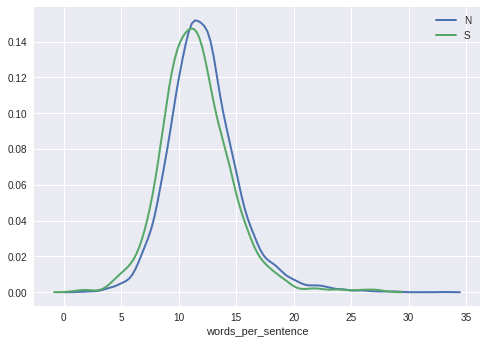

In [0]:
subset = data[data['N'] == 1].groupby('user_id').mean()
sns.distplot(subset['words_per_sentence'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'N')

subset = data[data['N'] == 0].groupby('user_id').mean()
sns.distplot(subset['words_per_sentence'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'S')

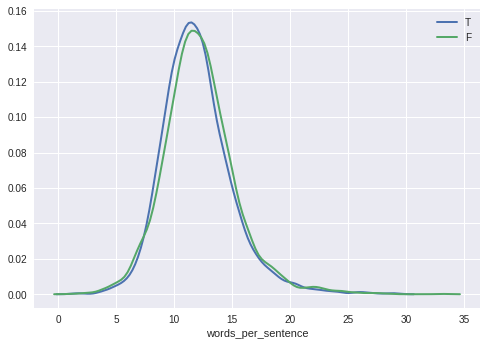

In [0]:
subset = data[data['T'] == 1].groupby('user_id').mean()
sns.distplot(subset['words_per_sentence'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'T')

subset = data[data['T'] == 0].groupby('user_id').mean()
sns.distplot(subset['words_per_sentence'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'F')

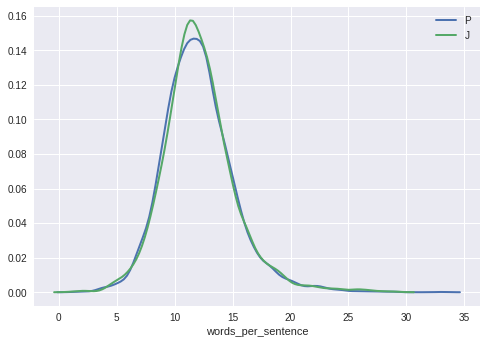

In [0]:
subset = data[data['P'] == 1].groupby('user_id').mean()
sns.distplot(subset['words_per_sentence'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'P')

subset = data[data['P'] == 0].groupby('user_id').mean()
sns.distplot(subset['words_per_sentence'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = 'J')

In [0]:
data.columns

Index(['user_id', 'type', 'post_id', 'post', 'I', 'E', 'N', 'S', 'T', 'F', 'J',
       'P', 'urls_count', 'words_count', 'sentences_count',
       'words_per_sentence'],
      dtype='object')

In [0]:
user_data = data.groupby('user_id').agg({
    'type': 'max',
    'I': 'max', 
    'E': 'max', 
    'N': 'max', 
    'S': 'max', 
    'T': 'max', 
    'F': 'max', 
    'J': 'max', 
    'P': 'max',
    'post': 'count',
    'words_count': ['mean', 'var'],
    'sentences_count': 'mean'
})

user_data.columns = ["_".join(y) for y in user_data.columns.ravel()]

user_data.rename(
    inplace=True,
    columns={
        'type_max': 'type',
        'I_max': 'I', 
        'E_max': 'E', 
        'N_max': 'N', 
        'S_max': 'S', 
        'T_max': 'T', 
        'F_max': 'F', 
        'J_max': 'J', 
        'P_max': 'P',
        'words_count_mean': 'words_per_post',
        'sentences_count_mean': 'sentences_per_post'
    }    
)

user_data.describe()

,I,E,N,S,T,F,J,P,post_count,words_per_post,words_count_var,sentences_per_post
count,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8674.000000,8675.000000
mean,0.769568,0.230432,0.862017,0.137983,0.458905,0.541095,0.395850,0.604150,48.742939,26.128059,140.191571,2.395225
std,0.421134,0.421134,0.344902,0.344902,0.498337,0.498337,0.489061,0.489061,5.475907,5.787802,49.314248,0.515206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.400000,0.857143,0.916667
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,22.729565,107.754949,2.060000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,50.000000,26.980000,143.423878,2.400000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,50.000000,30.440000,174.187347,2.740000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,38.600000,319.905263,6.040000


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


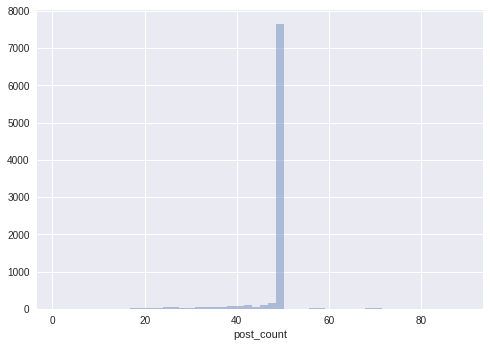

In [0]:
sns.distplot(user_data['post_count'], kde=False)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


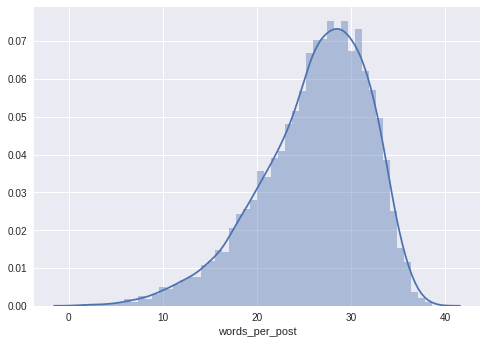

In [0]:
sns.distplot(user_data['words_per_post'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


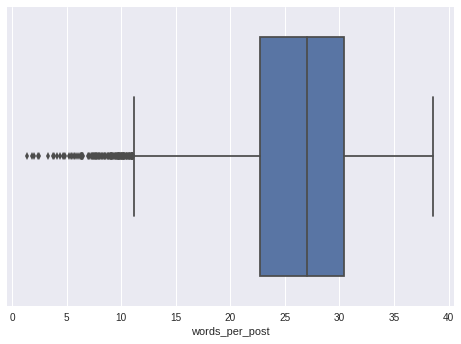

In [0]:
sns.boxplot(x='words_per_post', data=user_data)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


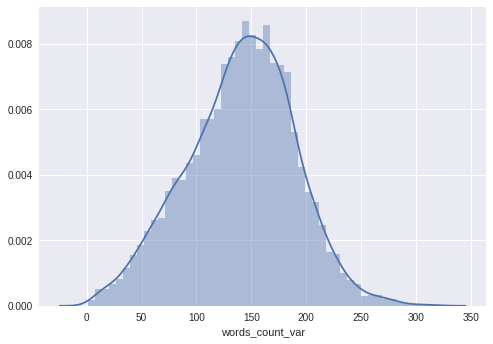

In [0]:
sns.distplot(user_data[user_data['words_count_var'].notna()]['words_count_var'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


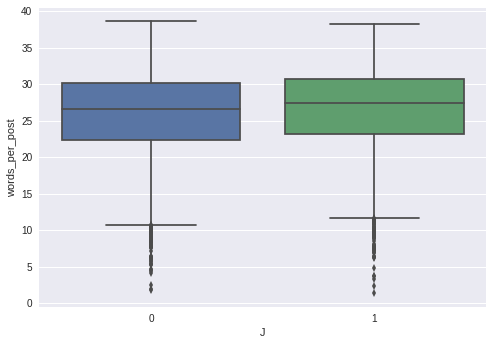

In [0]:
sns.boxplot(x='J', y='words_per_post', data=user_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


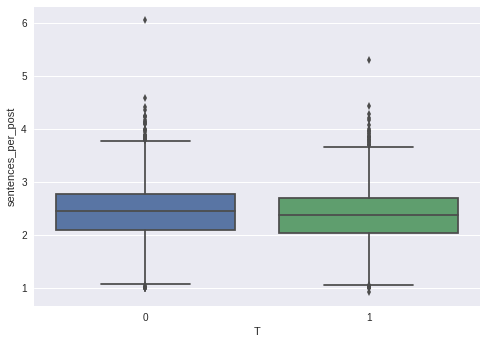

In [0]:
sns.boxplot(x='T', y='sentences_per_post', data=user_data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


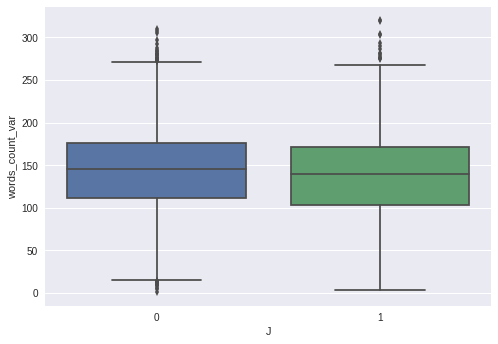

In [0]:
sns.boxplot(x='J', y='words_count_var', data=user_data)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


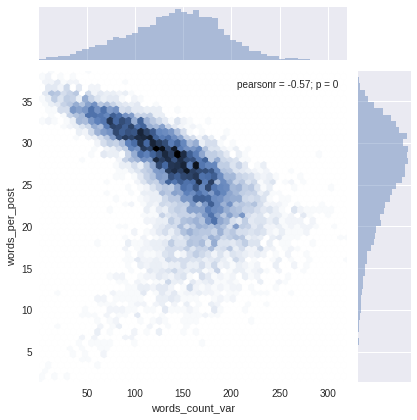

In [0]:
sns.jointplot(x='words_count_var', y='words_per_post', data=user_data, kind='hex')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


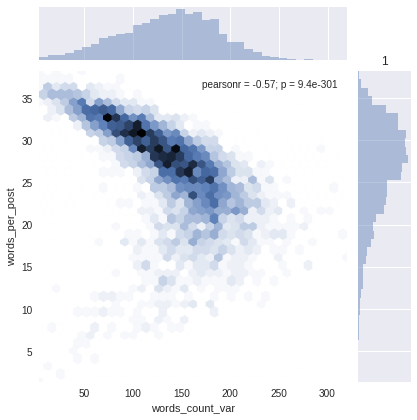

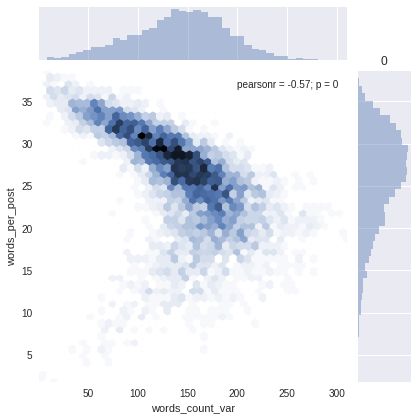

In [0]:
for t in user_data['J'].unique():
  sns.jointplot(x='words_count_var', y='words_per_post', data=user_data[user_data['J'] == t], kind='hex')
  plt.title(t)

In [0]:
data.head()

,user_id,type,post_id,post,I,E,N,S,T,F,J,P,urls_count,words_count,sentences_count,words_per_sentence
0,0,INFJ,0,'http://www.youtube.com/watch?v=qsXHcwe3krw,1,0,1,0,0,1,1,0,1,1,1,1.0
1,0,INFJ,1,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,1,0,1,0,0,1,1,0,1,1,1,1.0
2,0,INFJ,2,enfp and intj moments https://www.youtube.com...,1,0,1,0,0,1,1,0,2,12,1,12.0
3,0,INFJ,3,What has been the most life-changing experienc...,1,0,1,0,0,1,1,0,0,10,1,10.0
4,0,INFJ,4,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,1,0,1,0,0,1,1,0,2,8,1,8.0


(-0.5, 399.5, 199.5, -0.5)

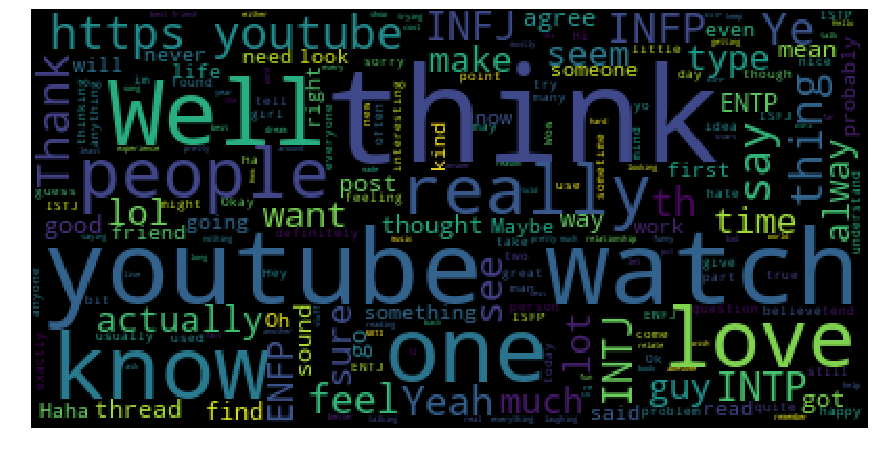

In [0]:
wordcloud = WordCloud().generate(data['post'].to_string())

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')

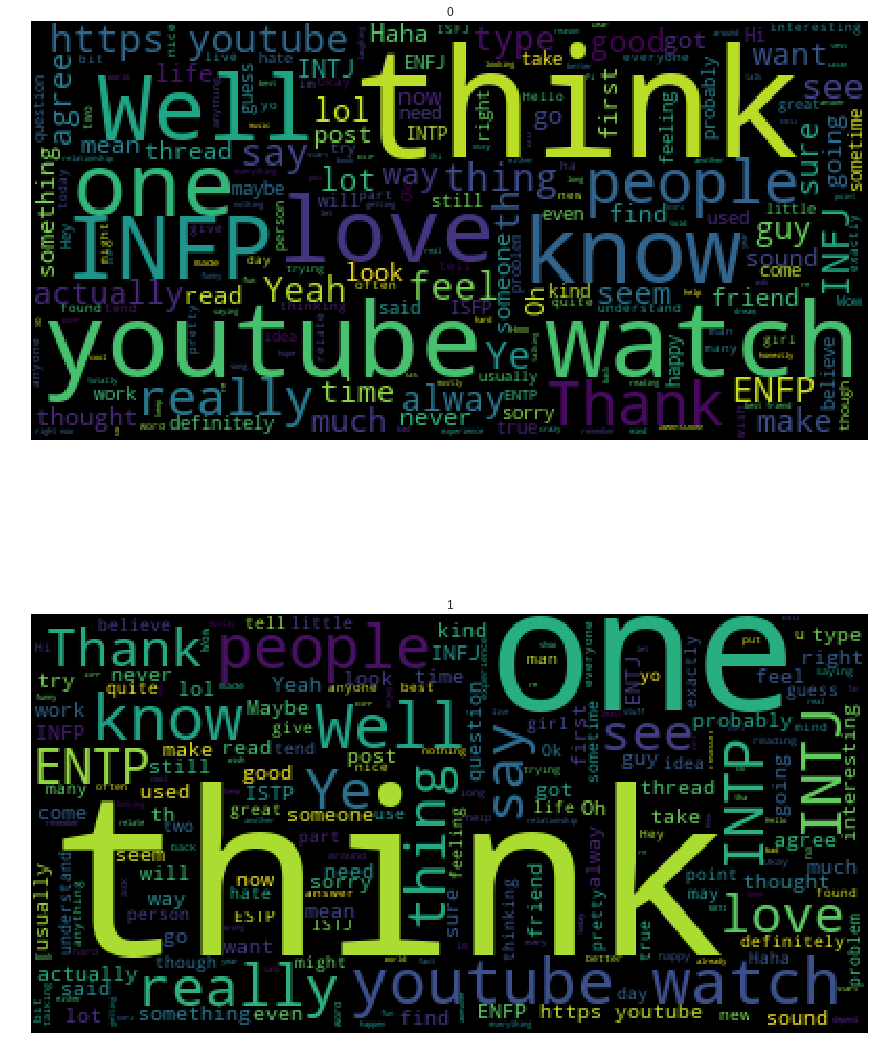

In [0]:
split_column = 'T'

types = data[split_column].unique()
fig, ax = plt.subplots(len(types), sharex=True, figsize=(15, 10*len(types)))

for i, t in enumerate(types):
  type_data = data[data[split_column] == t]
  
  wordcloud = WordCloud().generate(type_data['post'].to_string())
  ax[i].imshow(wordcloud)
  ax[i].set_title(t)
  ax[i].axis('off')